In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:
tf.__version__
keras.__version__

'2.12.0'

In [51]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full,y_train_full) ,(x_test,y_test)=fashion_mnist.load_data()

In [52]:
x_train_full.shape

(60000, 28, 28)

In [53]:
x_train_full.dtype

dtype('uint8')

In [54]:
x_valid,x_train=x_train_full[:5000]/255.0 , x_train_full[5000:]/255.0

In [55]:
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [56]:
class_names=["Tshirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","AnkleBoot"]

In [57]:
class_names[y_train[0]]

'Coat'

In [58]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.layers

In [61]:
hidden1=model.layers[1]

In [62]:
hidden1.name

'dense_6'

In [63]:
model.get_layer("dense") is hidden1

ValueError: ignored

In [64]:
weights,biases=hidden1.get_weights()

In [65]:
weights

array([[ 0.06456235, -0.02486164, -0.02573557, ..., -0.05984543,
         0.06959657,  0.00106943],
       [-0.01372092, -0.00946444,  0.04493509, ...,  0.03709146,
         0.06291258,  0.04400411],
       [-0.05575494, -0.03674718, -0.02258449, ...,  0.03874857,
         0.06643936, -0.07028543],
       ...,
       [ 0.01544907,  0.03096997, -0.02906236, ..., -0.01200546,
         0.02713019, -0.04080679],
       [-0.04832613,  0.01963327,  0.07240304, ...,  0.03698557,
         0.03899641,  0.05020133],
       [ 0.03932741,  0.02565013, -0.03068798, ...,  0.05035291,
         0.05413949,  0.06671989]], dtype=float32)

In [66]:
weights.shape

(784, 300)

In [67]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [68]:
biases.shape

(300,)

In [69]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [70]:
History=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7146 - accuracy: 0.7629 - val_loss: 0.5220 - val_accuracy: 0.8220
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4888 - accuracy: 0.8305 - val_loss: 0.4639 - val_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4437 - accuracy: 0.8456 - val_loss: 0.4512 - val_accuracy: 0.8426
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4157 - accuracy: 0.8540 - val_loss: 0.4088 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3955 - accuracy: 0.8612 - val_loss: 0.3813 - val_accuracy: 0.8708
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3789 - accuracy: 0.8668 - val_loss: 0.3695 - val_accuracy: 0.8746
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3655 - accuracy: 0.8710 - val_loss: 0.3740 - val_accuracy:

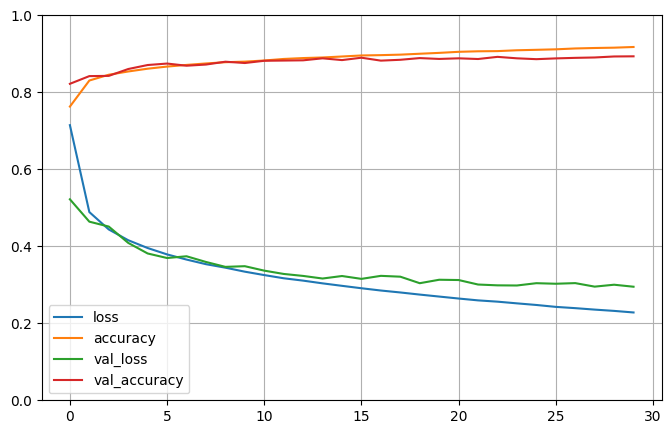

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(History.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [73]:
x_new=x_test[:3]
y_proba=model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 97ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [79]:
y_pred=model.predict(x_new)
y_pred

1/1 [==============================] - 0s 20ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [82]:
y_new=y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)